In [554]:
#Importing the necessary libraries

import pandas as pd #spreadsheet
from bs4 import BeautifulSoup as soup # html parser
import requests #get request
import urllib.request as urequest
import numpy as np
from bs4 import BeautifulSoup



In [555]:
#Importing url


url= 'https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population_density'

In [556]:
#Extracting the data from the html

page = requests.get(url)

soup = BeautifulSoup(page.text, 'html')

In [557]:
print(soup)

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of countries and dependencies by population density - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-f

In [558]:
#Searching the html for all table

soup.find_all('table')[0]

<table class="wikitable sortable mw-datatable sticky-header static-row-numbers sort-under col1left" style="text-align:right">
<caption>List of countries and dependencies showing population densities, populations, and areas
</caption>
<tbody><tr>
<th style="width:17em">Location
</th>
<th>Pop.<br/><span class="nowrap">/km<sup>2</sup></span>
</th>
<th>Pop.<br/><span class="nowrap">/sq mi</span>
</th>
<th>Population
</th>
<th>Area<br/>(km<sup>2</sup>)
</th>
<th>Area<br/>(<span class="nowrap">sq mi</span>)
</th>
<th class="unsortable">Notes
</th></tr>
<tr>
<td style="text-align:left"><span class="flagicon" style="display:inline-block;width:25px;text-align:left"><span class="mw-image-border" typeof="mw:File"><span><img alt="" class="mw-file-element" data-file-height="600" data-file-width="900" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/6/63/Flag_of_Macau.svg/23px-Flag_of_Macau.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/6/63/Flag_of_M

In [559]:
soup.find('table', class_ = 'wikitable sortable mw-datatable sticky-header static-row-numbers sort-under col1left" style="text-align:right')


In [560]:
table = soup.find_all('table')[0]

In [561]:
data = soup.find_all('table')

# Accessing the first wikitable
if data:
    table = data 
    df = pd.read_html(str(table)) #Use pd t

C:\Users\HELLO\AppData\Local\Temp\ipykernel_17148\2543857629.py:6: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table)) #Use pd t


In [562]:
#Viewing the dataset

countries_popu = df[0]
countries_popu.head()

,Location,Pop. /km2,Pop. /sq mi,Population,Area (km2),Area (sq mi),Notes
0,Macau (China),21000.0,54000.0,704150,33.0,13.00,NaN
1,Monaco,18000.0,47000.0,36298,2.0,0.77,[3]
2,Singapore,8250.0,21400.0,6014723,729.0,281.00,NaN
3,Hong Kong (China),6725.0,17420.0,7491609,1114.0,430.00,NaN
4,Gibraltar (UK),4800.0,12000.0,32688,6.8,2.60,[4]


In [563]:
#Checking for missing values

countries_popu.isnull().sum()

Location          0
Pop. /km2         0
Pop. /sq mi       0
Population        0
Area (km2)        0
Area (sq mi)      0
Notes           229
dtype: int64

In [564]:
#Checking column names

countries_popu.columns

Index(['Location', 'Pop. /km2', 'Pop. /sq mi', 'Population', 'Area (km2)',
       'Area (sq mi)', 'Notes'],
      dtype='object')

In [565]:
#Converting the data to a DataFrame

countries_popu_df=pd.DataFrame(countries_popu)

In [566]:
type(countries_popu_df)

pandas.core.frame.DataFrame

### Objectives of the analysis include:
#### 1. Identify the location with the highest population.
#### 2. Analyze the top 10 locations with the highest population density.
#### 3. Identify the location with the lowest population.
#### 4. Examine the top 10 locations by population size.
#### 5. Explore the relationship between the population size and the area of different locations.

In [568]:
#Importing all necessary libraries for visualization


import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Objective 1
#### Identify the location with the highest population.

In [570]:
# Identifying the location with the highest population

highest_population =countries_popu_df.loc[countries_popu_df['Population'].idxmax()]
#highest_population_loc =countries_popu_df.loc[countries_popu_df['Location'].idxmax()]

In [571]:
highest_population

Location        World (excluding Antarctica)
Pop. /km2                               60.0
Pop. /sq mi                            160.0
Population                        8045311448
Area (km2)                       134740000.0
Area (sq mi)                      52020000.0
Notes                                    NaN
Name: 159, dtype: object

#### From the above, World (excluding Antarctica) is the location with the highest population, this analysis helps highlight where the largest communities reside.

### Objective 2
#### Analyze the top 10 locations with the highest population density. 

In [574]:
# Sorting by population density inorder to select the top 10 countries

top_10_countries = countries_popu_df.sort_values(by='Pop. /km2', ascending=False).head(10)
top_10_countries

,Location,Pop. /km2,Pop. /sq mi,Population,Area (km2),Area (sq mi),Notes
0,Macau (China),21000.0,54000.0,704150,33.00,13.00,NaN
1,Monaco,18000.0,47000.0,36298,2.00,0.77,[3]
2,Singapore,8250.0,21400.0,6014723,729.00,281.00,NaN
3,Hong Kong (China),6725.0,17420.0,7491609,1114.00,430.00,NaN
4,Gibraltar (UK),4800.0,12000.0,32688,6.80,2.60,[4]
5,Bahrain,1910.0,4900.0,1485510,778.00,300.00,NaN
6,Maldives,1750.0,4500.0,523787,300.00,120.00,NaN
7,Malta,1700.0,4400.0,535065,315.00,122.00,NaN
8,Vatican City,1600.0,4100.0,764,0.49,0.19,[b]
9,Sint Maarten (NL),1300.0,3400.0,44222,34.00,13.00,NaN


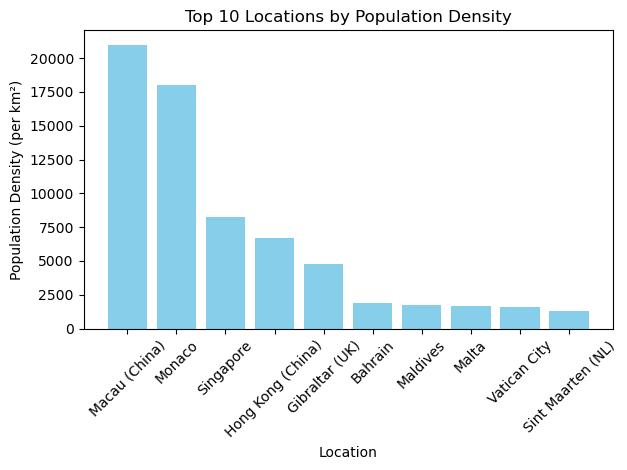

In [575]:
# Ploting for the top 10 countries


plt.bar(top_10_countries['Location'], top_10_countries['Pop. /km2'], color='skyblue')
plt.xlabel('Location')
plt.ylabel('Population Density (per km²)')
plt.title('Top 10 Locations by Population Density')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### The above visualization shows the top 10 locations by population density in descending order, it can be seen that Macau(China) has the highest value followed by Monaco while Sint Maarten (NL) has the least from the top 10 sorted. This analysis provides insights into the distribution of people within an area, it also pinpoint areas that may require special attention in terms of infrastructure, resources, and urban planning.

### Objective 3
####  Identify the location with the lowest population.

In [578]:
#Identifying the Least Populated Locations

least_populated = countries_popu_df[countries_popu_df['Population'] == countries_popu_df['Population'].min()]

print("\nLeast Populated Location:")
print(least_populated)



Least Populated Location:
                  Location  Pop. /km2  Pop. /sq mi  Population  Area (km2)  \
249  Pitcairn Islands (UK)        0.9          2.3          40        47.0   

     Area (sq mi) Notes  
249          18.0   [i]  


#### The above output shows that Pitcairn Islands (UK) is the least populated location. This means that Pitcairn Islands (UK) is the area with the fewest people living in it, providing insight into the population distribution and the relative size of the community.

### Objective 4
####  Examine the top 10 locations by population size.

C:\Users\HELLO\AppData\Local\Temp\ipykernel_17148\3201628453.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_countries, x='Location', y='Population', palette='viridis')


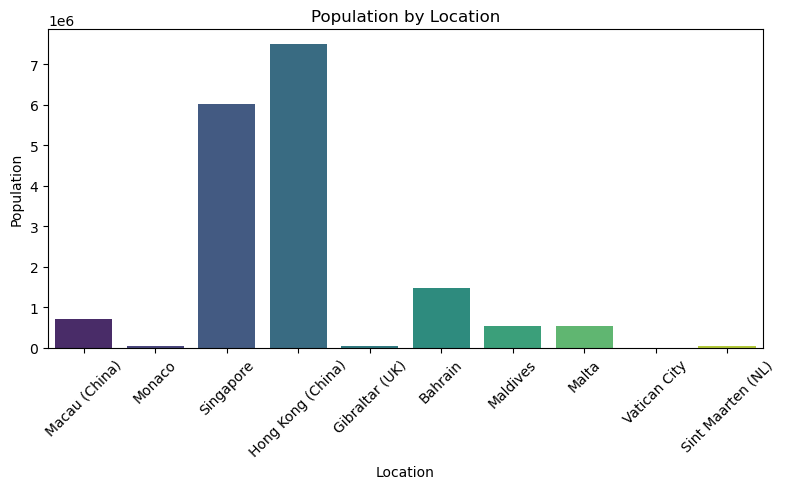

In [581]:
# Ploting Population by Location 


plt.figure(figsize=(8, 5))
sns.barplot(data=top_10_countries, x='Location', y='Population', palette='viridis')
plt.title("Population by Location")
plt.xlabel("Location")
plt.ylabel("Population")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### The above graph shows the top 10 population by location with Hong Kong (China) having the highest population, this is a useful visualization because it helps to compare the population sizes of different locations.

In [583]:
countries_popu_df.columns

Index(['Location', 'Pop. /km2', 'Pop. /sq mi', 'Population', 'Area (km2)',
       'Area (sq mi)', 'Notes'],
      dtype='object')

### Objective 5
#### To explore the relationship between the population size and the area of different locations.

C:\Users\HELLO\AppData\Local\Temp\ipykernel_17148\120462083.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=countries_popu_df, x='Area (km2)', y='Population', sizes=(50, 200), palette='viridis')


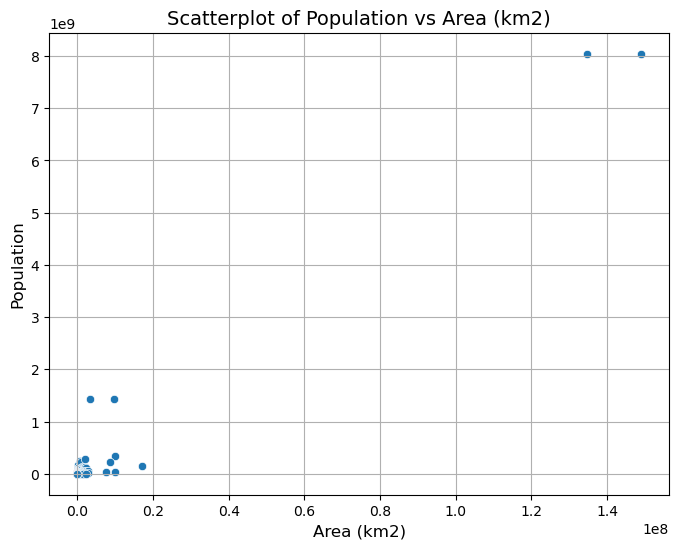

In [585]:
#Plotting the relationship between the population size and area of locations

plt.figure(figsize=(8, 6))
sns.scatterplot(data=countries_popu_df, x='Area (km2)', y='Population', sizes=(50, 200), palette='viridis')
plt.title("Scatterplot of Population vs Area (km2)", fontsize=14)
plt.xlabel("Area (km2)", fontsize=12)
plt.ylabel("Population", fontsize=12)
plt.grid(True)
plt.show()


### Most locations are clustered in the bottom left of the plot above, indicating that many areas have relatively small land sizes(area) and lower populations showing a positive correlation. Two locations are spread at the top-right, indicating that some areas have both large land sizes and high populations, these two points might seem like outliers but they show an interesting insights of: "the higher the area, the higher the population"